In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns


In [2]:
df=pd.read_csv(r'C:\Users\şerefcanmemiş\Downloads\Project.csv') 

In [3]:
df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


In [4]:
dataset_info = {
    "Missing values":df.isna().sum(),
    "number of rows":df.shape[0],
    "number of columns":df.shape[1],
    "data types":df.dtypes,
    "column names":df.columns
}

In [5]:
dataset_info

{'Missing values': transaction_id      0
 transaction_date    0
 transaction_time    0
 store_id            0
 store_location      0
 product_id          0
 transaction_qty     0
 unit_price          0
 Total_Bill          0
 product_category    0
 product_type        0
 product_detail      0
 Size                0
 Month Name          0
 Day Name            0
 Hour                0
 Month               0
 Day of Week         0
 dtype: int64,
 'number of rows': 149116,
 'number of columns': 18,
 'data types': transaction_id        int64
 transaction_date     object
 transaction_time     object
 store_id              int64
 store_location       object
 product_id            int64
 transaction_qty       int64
 unit_price          float64
 Total_Bill          float64
 product_category     object
 product_type         object
 product_detail       object
 Size                 object
 Month Name           object
 Day Name             object
 Hour                  int64
 Month                

In [6]:
numerical_stats = df.describe()
numerical_stats

,transaction_id,store_id,product_id,transaction_qty,unit_price,Total_Bill,Hour,Month,Day of Week
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,5.342063,47.918607,1.438276,3.382219,4.686367,11.735790,3.988881,2.982336
std,43153.600016,2.074241,17.930020,0.542509,2.658723,4.227099,3.764662,1.673091,1.996650
min,1.000000,3.000000,1.000000,1.000000,0.800000,0.800000,6.000000,1.000000,0.000000
25%,37335.750000,3.000000,33.000000,1.000000,2.500000,3.000000,9.000000,3.000000,1.000000
50%,74727.500000,5.000000,47.000000,1.000000,3.000000,3.750000,11.000000,4.000000,3.000000
75%,112094.250000,8.000000,60.000000,2.000000,3.750000,6.000000,15.000000,5.000000,5.000000
max,149456.000000,8.000000,87.000000,8.000000,45.000000,360.000000,20.000000,6.000000,6.000000


In [7]:
# unique counts and 5 examples
categorical_columns = df.select_dtypes(include=["object"]).columns
categorical_stats ={column:{"count unique":df[column].nunique(),
                    "5 examples":df[column].unique()[:5]} for column in categorical_columns}

In [8]:
categorical_stats

{'transaction_date': {'count unique': 181,
  '5 examples': array(['01-06-2023', '02-06-2023', '03-06-2023', '04-06-2023',
         '05-06-2023'], dtype=object)},
 'transaction_time': {'count unique': 25762,
  '5 examples': array(['11:33:29', '11:18:24', '12:02:45', '19:39:47', '12:24:57'],
        dtype=object)},
 'store_location': {'count unique': 3,
  '5 examples': array(['Astoria', 'Lower Manhattan', "Hell's Kitchen"], dtype=object)},
 'product_category': {'count unique': 9,
  '5 examples': array(['Tea', 'Coffee', 'Bakery', 'Drinking Chocolate', 'Flavours'],
        dtype=object)},
 'product_type': {'count unique': 29,
  '5 examples': array(['Brewed herbal tea', 'Brewed Black tea', 'Brewed Green tea',
         'Brewed Chai tea', 'Drip coffee'], dtype=object)},
 'product_detail': {'count unique': 45,
  '5 examples': array(['Peppermint', 'Lemon Grass', 'Earl Grey', 'English Breakfast',
         'Serenity Green Tea'], dtype=object)},
 'Size': {'count unique': 4,
  '5 examples': array([

In [9]:
#converting object to date and time
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format="%d-%m-%Y")
df['transaction_time'] = pd.to_timedelta(df['transaction_time'])
df[['transaction_date','transaction_time']].head()

,transaction_date,transaction_time
0,2023-06-01,0 days 11:33:29
1,2023-06-02,0 days 11:18:24
2,2023-06-02,0 days 12:02:45
3,2023-06-02,0 days 19:39:47
4,2023-06-03,0 days 12:24:57


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June')])

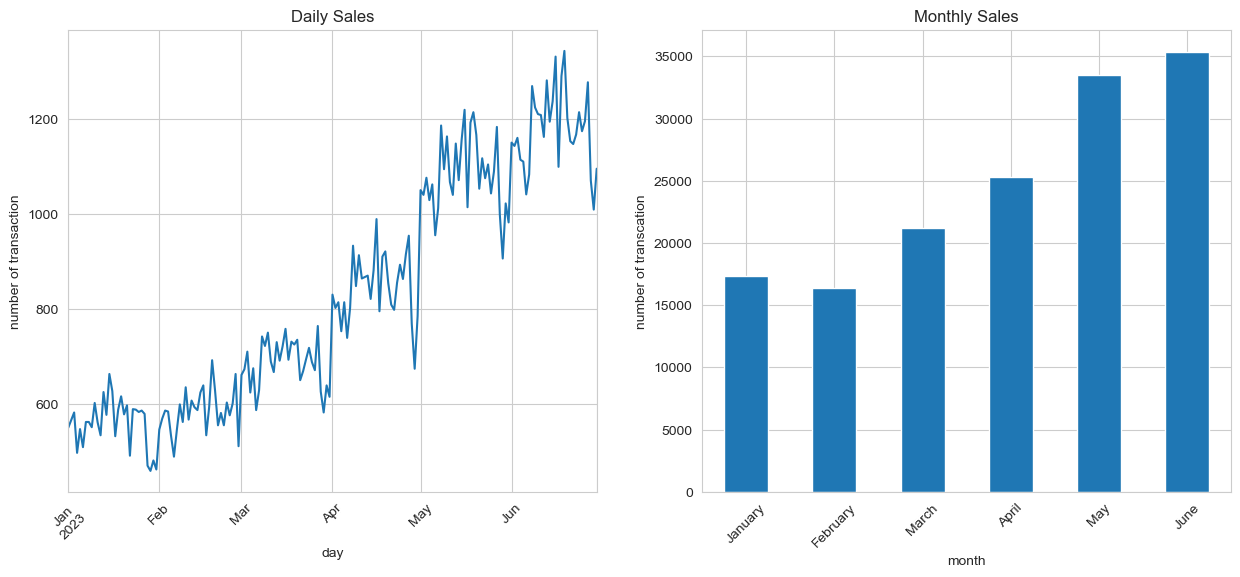

In [10]:
# Lets check out trends and patterns
daily_sales = df.groupby(df['transaction_date']).size()

monthly_sales = df.groupby(df['Month Name']).size().reindex(['January','February','March','April','May','June'])

sns.set_style('whitegrid')

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
daily_sales.plot(xlabel='day', ylabel='number of transaction')
plt.title('Daily Sales')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
monthly_sales.plot(xlabel='month', ylabel='number of transcation',kind='bar')
plt.title('Monthly Sales')
plt.xticks(rotation=45)

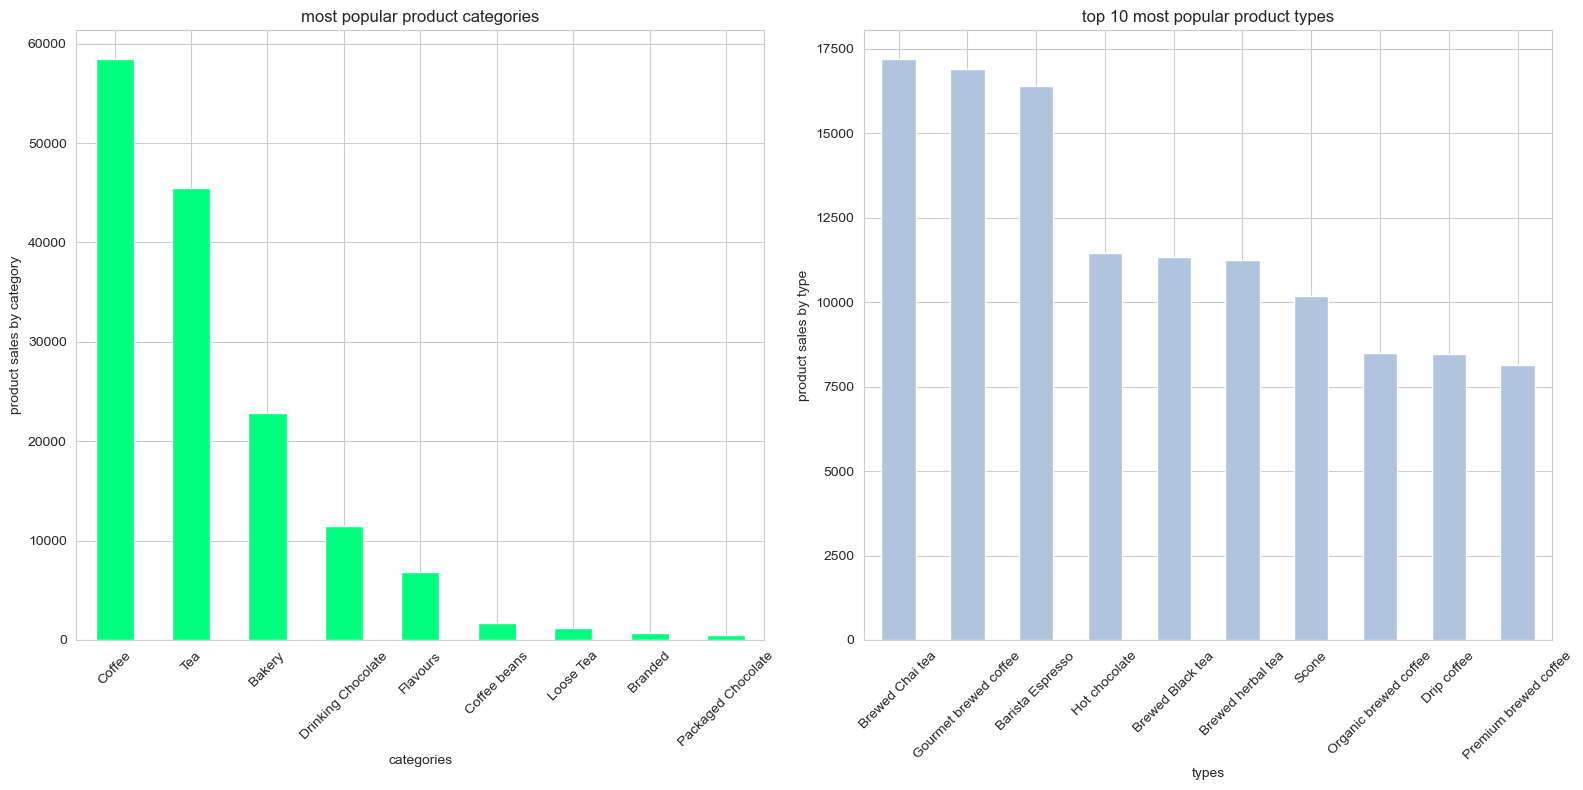

In [11]:
# most popular product categories
category_sales = df['product_category'].value_counts()

# most popular product types
type_sales = df['product_type'].value_counts()
# top 10 
top10_type_sales=type_sales[:10]  

# plotting them
sns.set_style('whitegrid')

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
category_sales.plot(xlabel='categories', ylabel='product sales by category', title='most popular product categories' ,
                    color='springgreen',kind='bar')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
top10_type_sales.plot(xlabel='types', ylabel='product sales by type', title='top 10 most popular product types',color='lightsteelblue',kind='bar')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

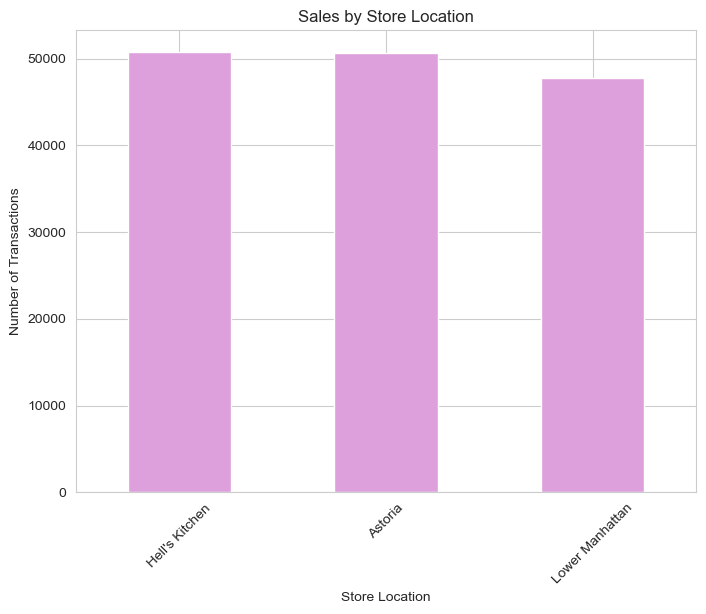

In [12]:
# Store Analysis

## Sales by Store Location
store_sales = df['store_location'].value_counts()

# Plotting store analysis
plt.figure(figsize=(8, 6))
store_sales.plot(kind='bar', title='Sales by Store Location', xlabel='Store Location', ylabel='Number of Transactions', color='plum')
plt.xticks(rotation=45)

plt.show()

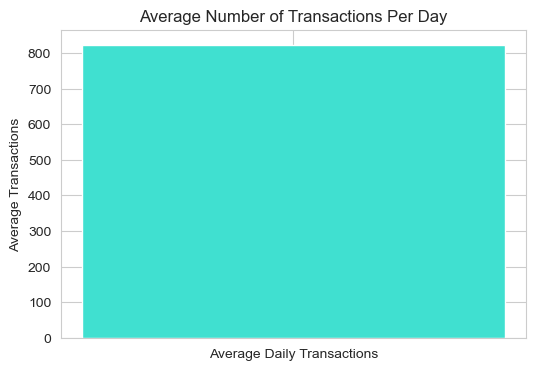

823.8453038674033

In [13]:
# 1- What is the average number of transactions per day?
avg_daily_transactions = daily_sales.mean()

# Creating a bar chart for average daily transactions
plt.figure(figsize=(6, 4))
plt.bar(x='Average Daily Transactions', height=avg_daily_transactions, color='turquoise')
plt.title('Average Number of Transactions Per Day')
plt.ylabel('Average Transactions')
plt.show()

# Answer for Q1
avg_daily_transactions

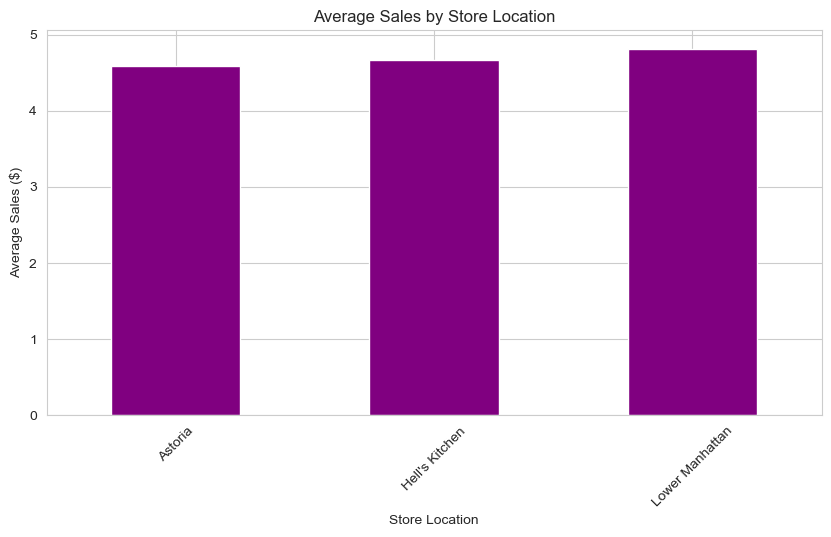

store_location
Astoria            4.589891
Hell's Kitchen     4.661696
Lower Manhattan    4.814726
Name: Total_Bill, dtype: float64

In [14]:
# 2- Which store location has the highest average sales?
avg_store_sales=df.groupby('store_location')['Total_Bill'].mean()

plt.figure(figsize=(10,5))
avg_store_sales.plot(kind='bar',color='purple')
plt.title('Average Sales by Store Location')
plt.ylabel('Average Sales ($)')
plt.xlabel('Store Location')
plt.xticks(rotation=45)
plt.show()

avg_store_sales

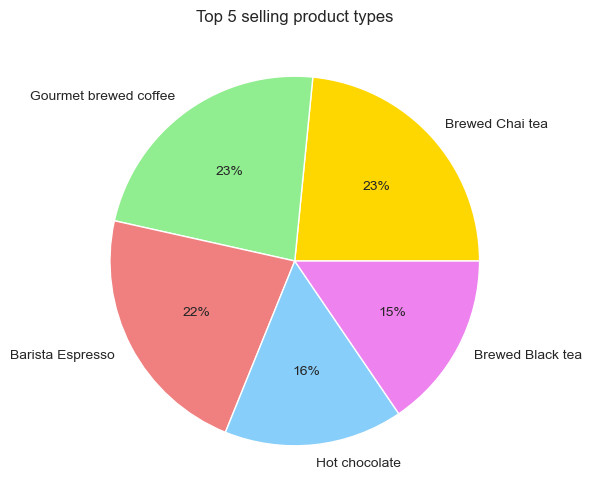

product_type
Brewed Chai tea          17183
Gourmet brewed coffee    16912
Barista Espresso         16403
Hot chocolate            11468
Brewed Black tea         11350
Name: count, dtype: int64

In [15]:
# 3- What are the top selling product types?
top5_product_types = df['product_type'].value_counts()[:5]

plt.figure(figsize=(15,6))
top5_product_types.plot(kind='pie',colors=['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'violet'],autopct='%1.0f%%')
plt.title('Top 5 selling product types')
plt.ylabel('')
plt.show()
top5_product_types

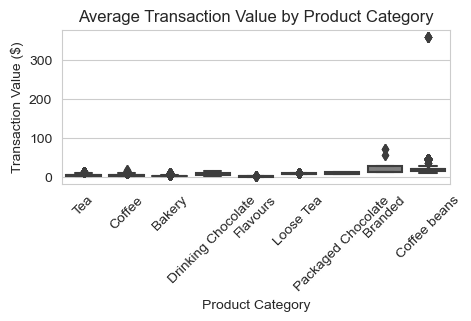

In [16]:
# 4- How does the average transaction value change by product category?
avg_transaction_product_category= df.groupby('product_category')['Total_Bill'].mean()
df['avg_transaction_product_category'] = df.groupby('product_category')['Total_Bill'].mean()
plt.figure(figsize=(5,2))
sns.boxplot(data=df,x='product_category',y='Total_Bill')
plt.title('Average Transaction Value by Product Category')
plt.ylabel('Transaction Value ($)')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()


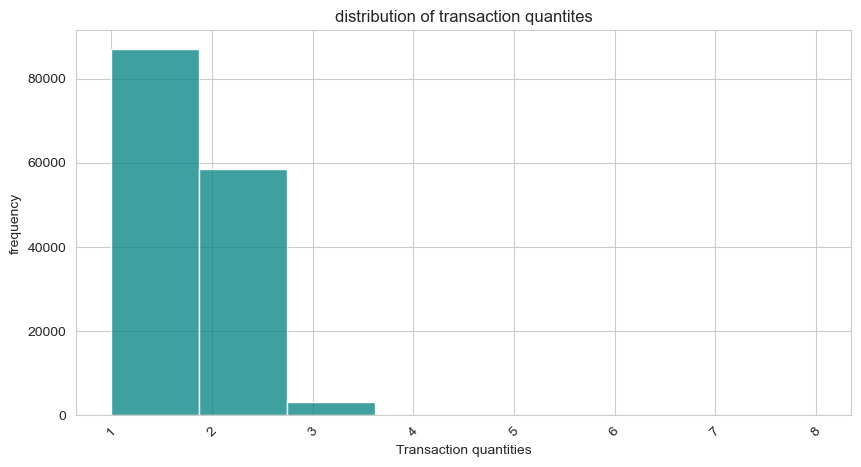

count    149116.000000
mean          1.438276
std           0.542509
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           8.000000
Name: transaction_qty, dtype: float64

In [17]:
# 5- What is the distribution of transaction quantites?
dbof_transaction_quantites = df['transaction_qty']
plt.figure(figsize=(10,5))
sns.histplot(x=dbof_transaction_quantites,bins=8,color='teal')
plt.title('distribution of transaction quantites')
plt.xlabel('Transaction quantities')
plt.ylabel('frequency')
plt.xticks(rotation=45)
plt.show()
dbof_transaction_quantites.describe()

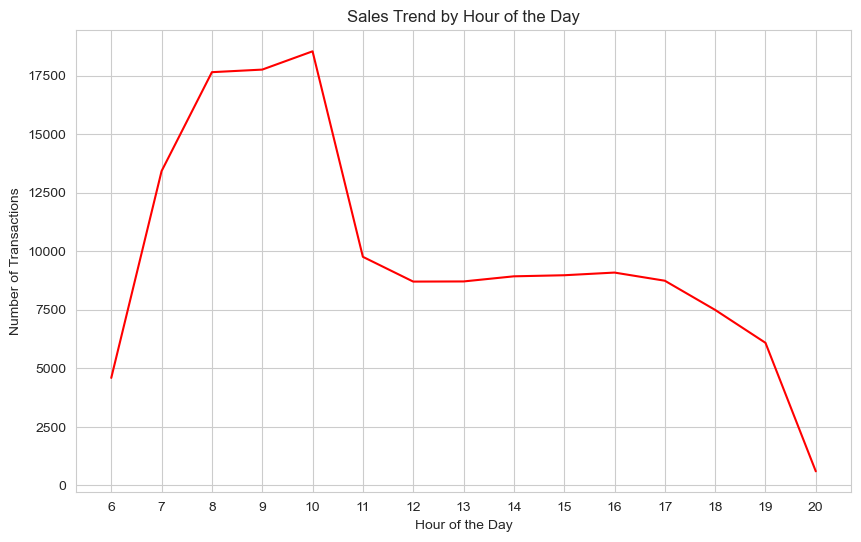

Hour
6      4594
7     13428
8     17654
9     17764
10    18545
11     9766
12     8708
13     8714
14     8933
15     8979
16     9093
17     8745
18     7498
19     6092
20      603
dtype: int64

In [18]:
# 6- What are the peak hours for sales
sales_by_hour = df.groupby('Hour').size()
plt.figure(figsize=(10, 6))
sales_by_hour.plot(kind='line', color='red')
plt.title('Sales Trend by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(6, 21))
plt.grid(True)
plt.show()
sales_by_hour

In [19]:
# Used to create a line on plot
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

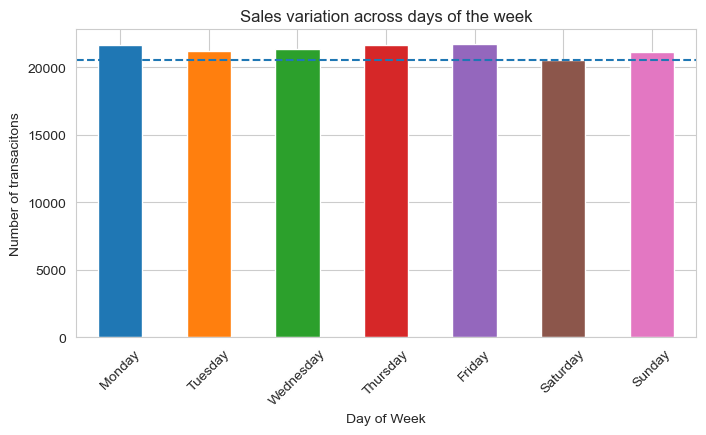

Day Name
Monday       21643
Tuesday      21202
Wednesday    21310
Thursday     21654
Friday       21701
Saturday     20510
Sunday       21096
dtype: int64

In [20]:
# 7- How do sales vary across days of the week?
# lets assume our aim to get 20,500
sales_across_dofw= df.groupby('Day Name').size().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

plt.figure(figsize=(8,4))
sales_across_dofw.plot(kind='bar',color=colors)
plt.xlabel('Day of Week')
plt.ylabel('Number of transacitons')
plt.title('Sales variation across days of the week')
plt.xticks(rotation=45)
abline(0,20500)
plt.show()
sales_across_dofw

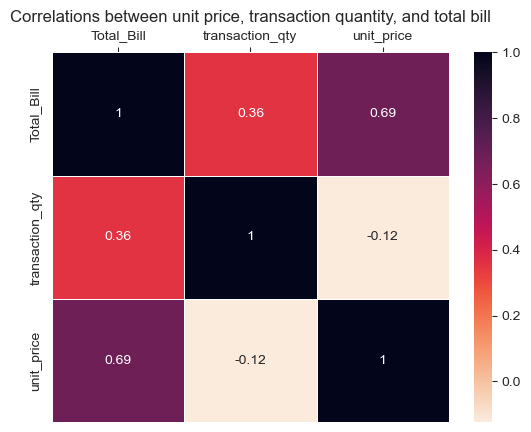

In [21]:
# 8- Correlations between unit price, transaction quantity, and total bill
correlation_data = df[['Total_Bill','transaction_qty','unit_price']]
correlation = correlation_data.corr()
corrcolor= sns.color_palette("rocket_r", as_cmap=True)
ax= sns.heatmap(correlation, cmap=corrcolor,annot=True,linewidth=0.5)
ax.set(xlabel='',ylabel='')
ax.set(title='Correlations between unit price, transaction quantity, and total bill')
ax.xaxis.tick_top()
plt.show()

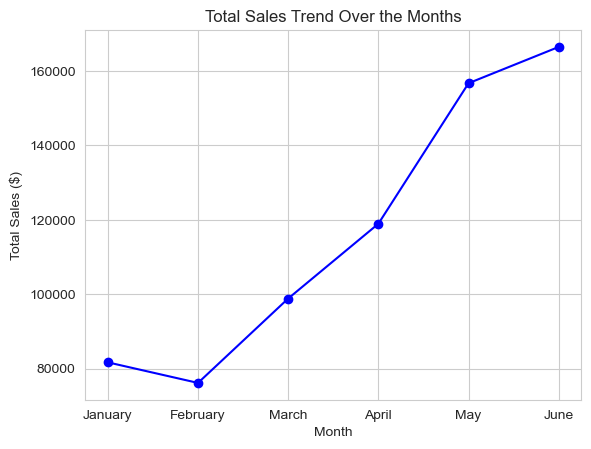

Month Name
January      81677.74
February     76145.19
March        98834.68
April       118941.08
May         156727.76
June        166485.88
Name: Total_Bill, dtype: float64

In [22]:
# 9- What is the trend of total sales over the months covered in the data?
total_sales_over_months= df.groupby('Month Name')['Total_Bill'].sum().reindex(['January','February','March','April','May','June'])
total_sales_over_months.plot(kind='line',marker='o',color='blue')
plt.title('Total Sales Trend Over the Months')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(range(6), ['January', 'February', 'March', 'April', 'May', 'June'])
plt.grid(True)
plt.show()
total_sales_over_months

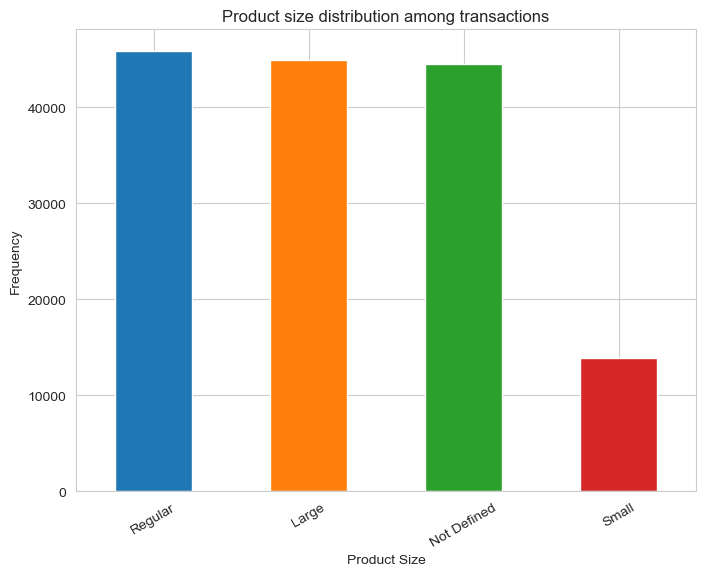

Size
Regular        45789
Large          44885
Not Defined    44518
Small          13924
Name: count, dtype: int64

In [23]:
# 10- Product size distribution among transactions
product_sizedb = df['Size'].value_counts()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.figure(figsize=(8, 6))
product_sizedb.plot(kind='bar',color=colors)
plt.xlabel('Product Size')
plt.ylabel('Frequency')
plt.title('Product size distribution among transactions')
plt.xticks(rotation=30)
plt.show()
product_sizedb

In [24]:
## Summary of Analysis with 10 Questions ##
# Here's a summary of the insights derived from the dataset, based on the 10 questions posed:

#1- Average Number of Transactions Per Day: Approximately 824 transactions occur daily.
#2- Highest Average Sales by Store Location: "Lower Manhattan" has the highest average sales at about $4.81 per transaction.
#3- Top 5 Best-Selling Product Types: "Brewed Chai tea" leads in sales, followed by "Gourmet brewed coffee" and "Barista Espresso".
#4- Average Transaction Value by Product Category: "Coffee beans" and "Branded" items show higher average transaction values.
#5- Distribution of Transaction Quantities: Most transactions involve 1 or 2 items.
#6- Sales Trend by Hour of the Day: Peak sales hours are between 8 AM and 10 AM.
#7- Sales Variation Across Days of the Week: Sales are fairly consistent across the week, with slight increases on Thursdays and Fridays.
#8- Correlation Matrix: Moderate positive correlation between unit price and total bill; weaker positive correlation between transaction quantity and total bill.
#9- Total Sales Trend Over the Months: Upward trend from January to June, with significant increases in May and June.
#10- Product Size Distribution Among Transactions: "Regular" and "Large" sizes are the most common in transactions.

In [29]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [50]:
# Data preprocessing 

features= ['store_location', 'product_category', 'product_type', 'Size', 'Hour', 'Day of Week', 'transaction_qty', 'unit_price']
X= df[features]
y= df['Total_Bill']

categorical_features= ['store_location','product_category','product_type','Size']
categorical_transformer= OneHotEncoder(handle_unknown='ignore')

numerical_features= ['Hour','Day of Week','transaction_qty']
numerical_transformer= StandardScaler()

ct= ColumnTransformer(
transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('num', numerical_transformer, numerical_features)])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=46)

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

X_train.shape, X_test.shape

((119292, 48), (29824, 48))

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2

(0.22458591790297833, 0.6353741970342923, 0.9643442509320742)